<a href="https://colab.research.google.com/github/elixane/mit_projects/blob/main/Customer_Personality_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/OnlineCourses/MIT/Project1/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

In [ ]:
# Show the first five rows of data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Copy the data to avoid editing the original data
data = data.copy()

In [ ]:
# Show the dimensions of the data
data.shape

(2240, 29)

#### **Question 1**: What are the data types of all the columns?

In [ ]:
# Show the data types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

Three objects: Education, Marital_Status and Dt_Customer

One float: Income

All other columns consist of integer values.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# Show statistical summary of the data
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [ ]:
# Calculate the average income
data['Income'].mean()

np.float64(52247.25135379061)

##### **Observations:**

The average household income is $52,247

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Check for total amount of missing values for each variable
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Replace missing income values with the average income in the dataset
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [ ]:
# Check if missing values have been succesfully replaced
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##### **Observations:**

Household Income has 24 missing values. Any missing values are replaced with the average household income.

All other variables have no missing values.

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# Check for the total amount of duplicates
data.duplicated().sum()

np.int64(0)

##### **Observations:**

There are no duplicates in the data.

In [ ]:
# Drop all the columns which are non numerical or which are not as relevent to this analysis
drop_cols = ['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue']
data.drop(columns=drop_cols, inplace=True)

In [ ]:
# Print dimensions of the data
data.shape

(2240, 18)

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

Year_Birth


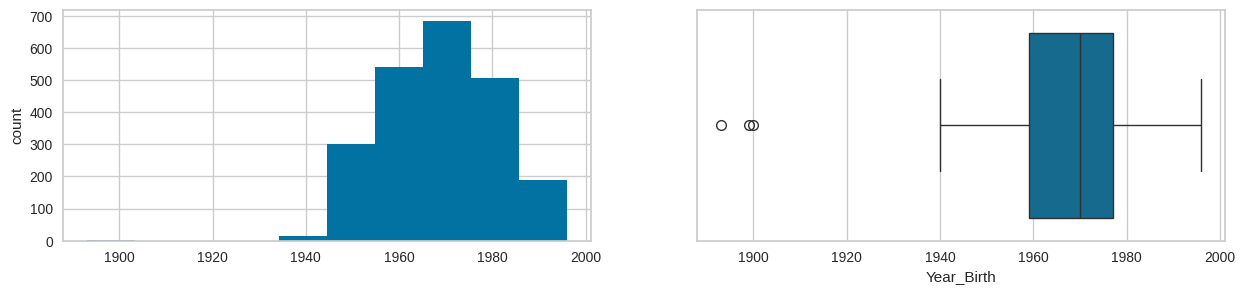

Income


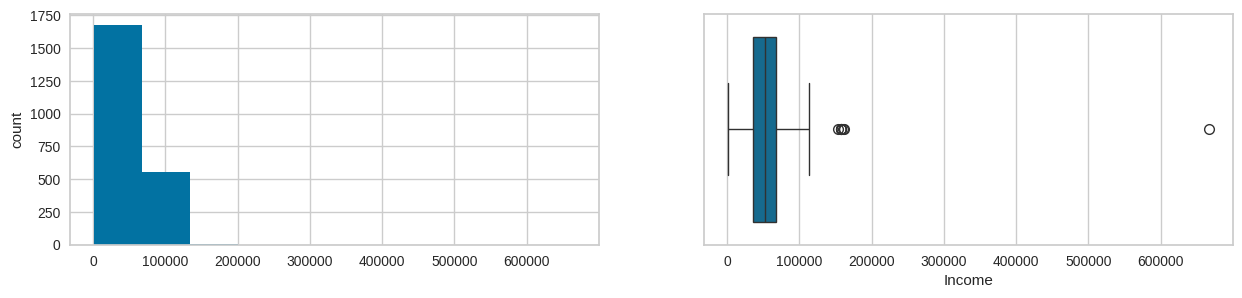

Kidhome


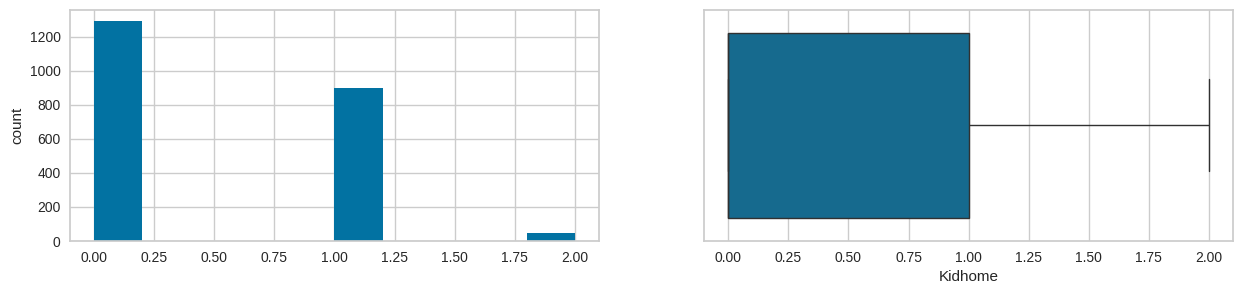

Teenhome


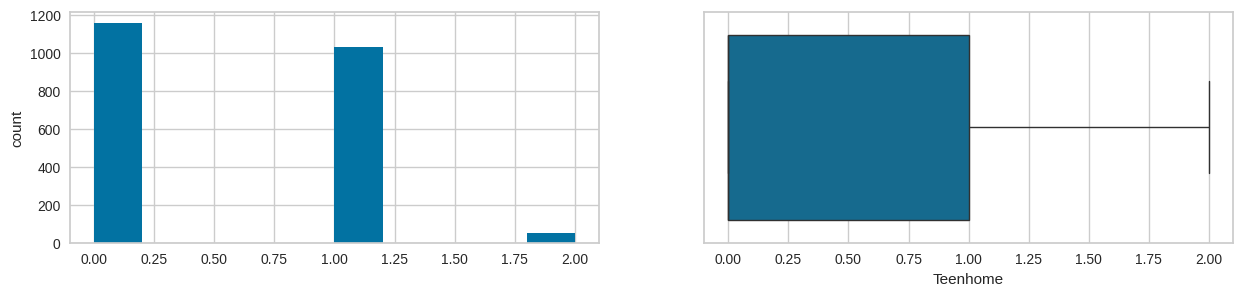

Recency


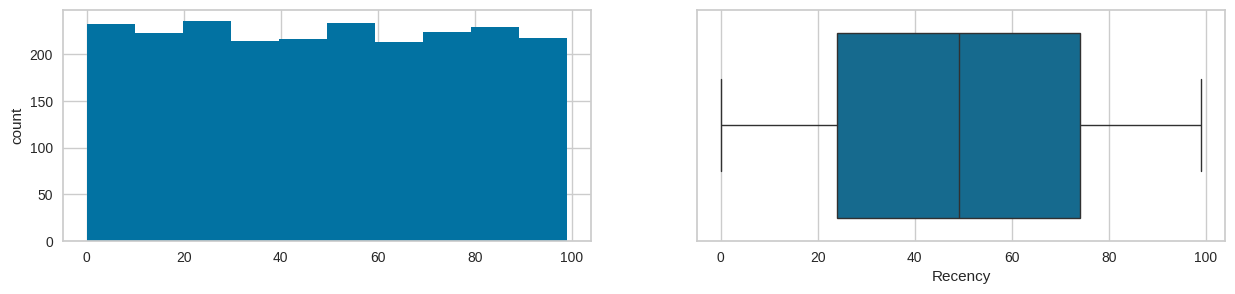

MntWines


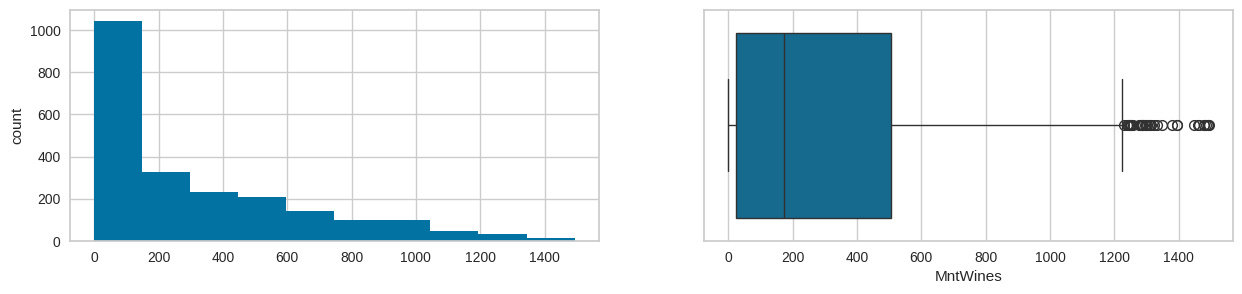

MntFruits


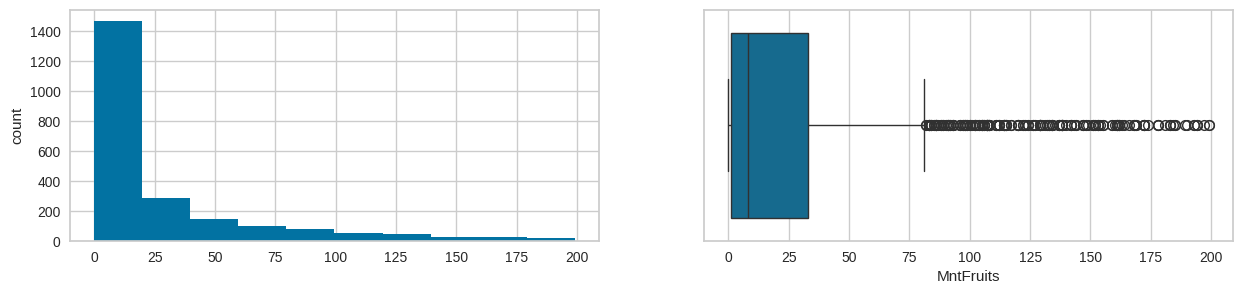

MntMeatProducts


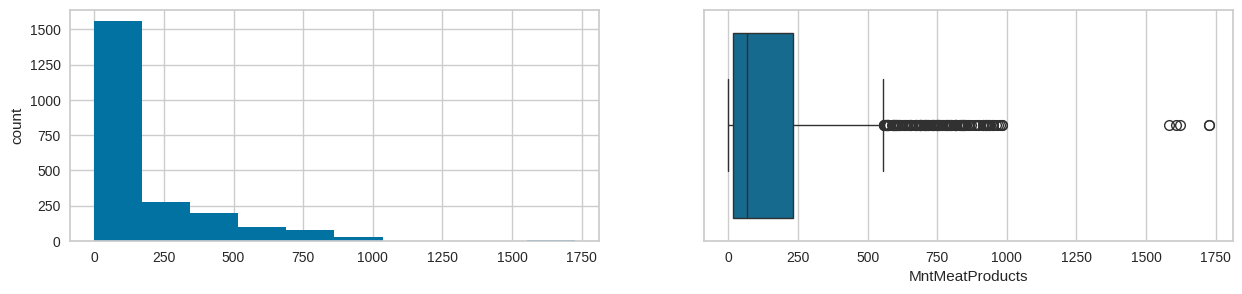

MntFishProducts


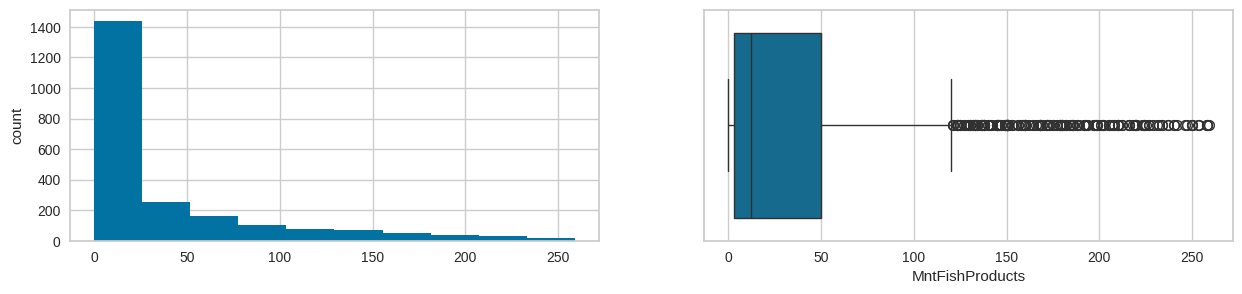

MntSweetProducts


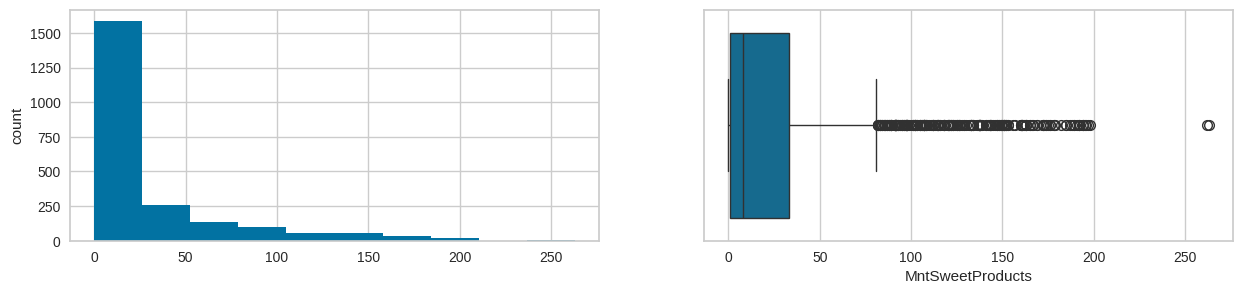

MntGoldProds


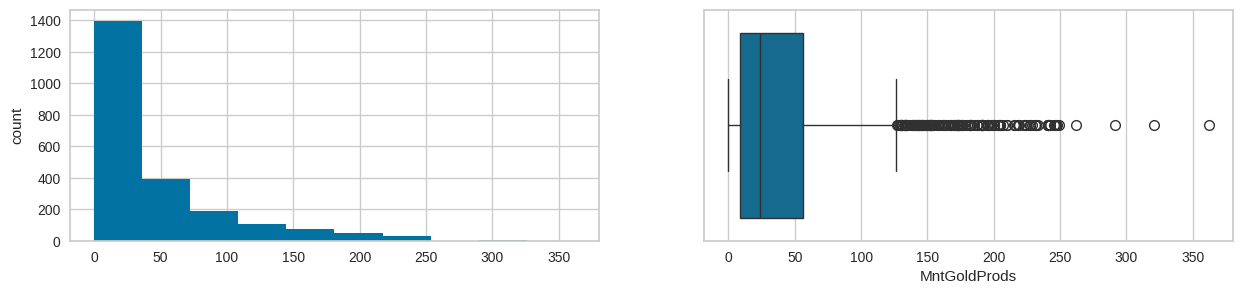

NumDealsPurchases


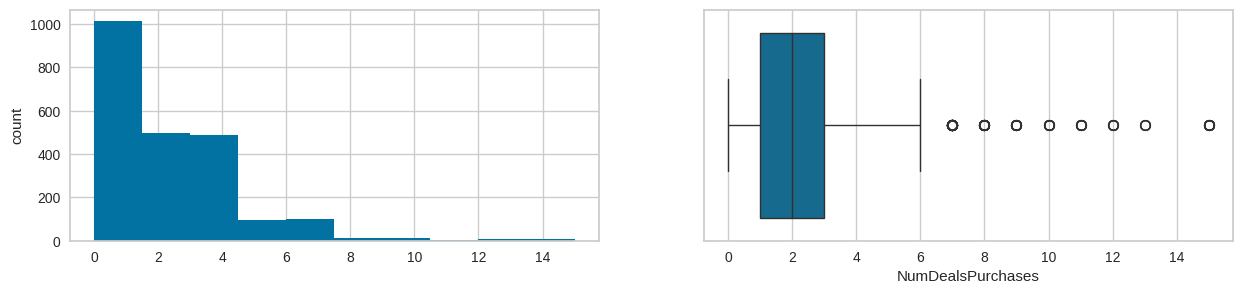

NumWebPurchases


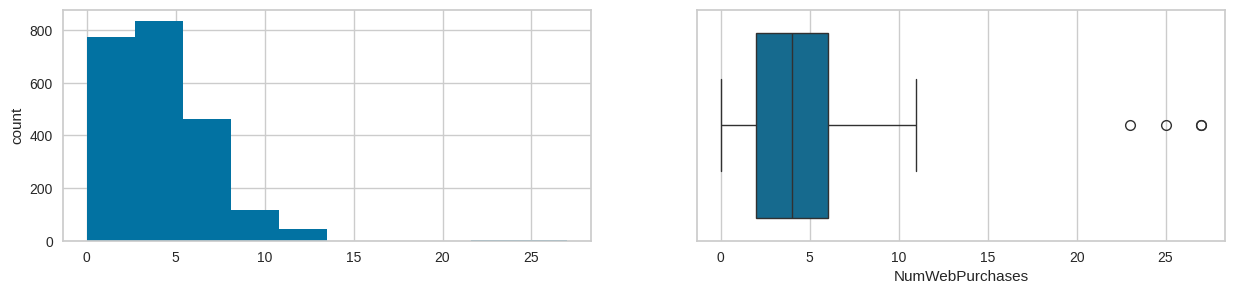

NumCatalogPurchases


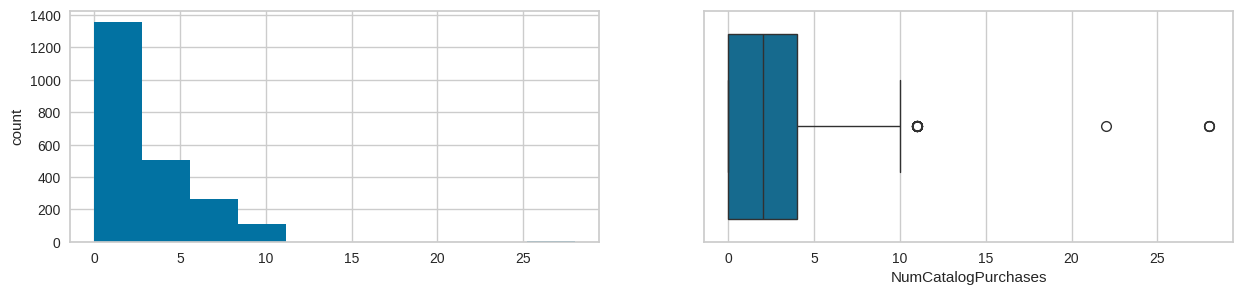

NumStorePurchases


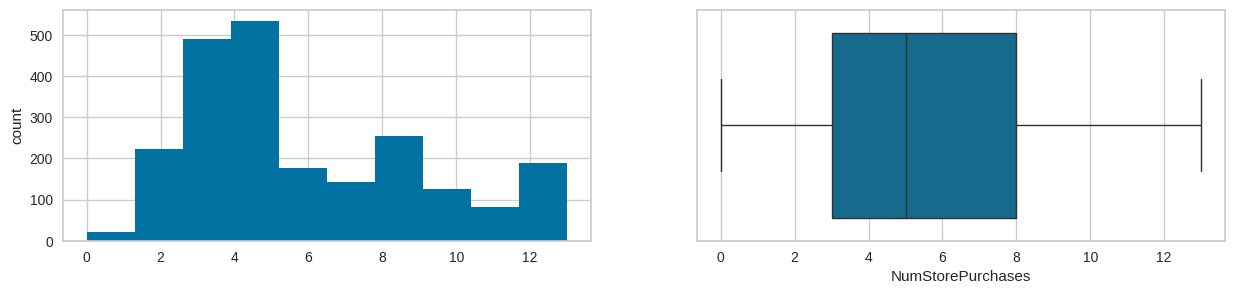

NumWebVisitsMonth


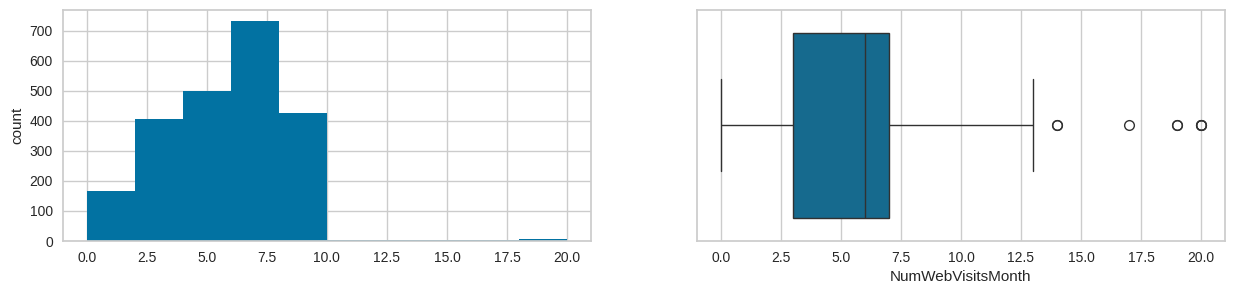

Complain


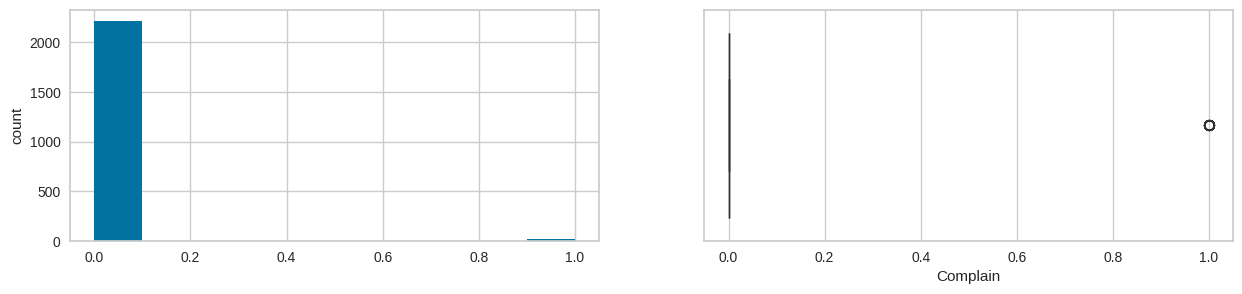

Response


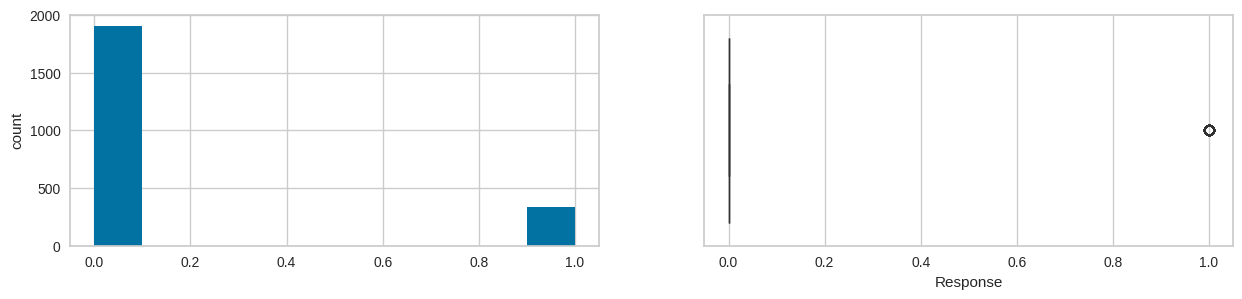

In [ ]:
# Get a list of all numerical columns in the dataset
num_cols = data.select_dtypes(include = "number").columns.to_list()

# Iterate over each numerical column to create a histogram and boxplot for each variable
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,3)) # Set figure size
    plt.subplot(1,2,1)
    data[col].hist(bins=10) # Plot a histogram for the given variable
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col]) # Plot a boxplot for the given variable
    plt.show()

##### **Observations:**
- Year of birth is normally distributed with an average of about 1970
- Most customers have income below 15,000, with one outlier at 60,000+
- All cutomers have 0, 1 or 2 kids at home, this variable is slightly right skewed
- All cutomers have 0, 1 or 2 teens at home, this variable is slightly right skewed
- Recency is uniformly distributed
- All the product purchase variables (wine, fish, meat, etc) are very right skewed and have many outliers on the right end of the distribution
- Number of deal purchases, web purchases and catalog purchases are slightly right skewed with a few outliers
- Number of store purchases seems somewhat normally distributed and has no outliers
- Number of web visits per month seems normally distributed, and has a few outliers to the right of the distribution
- There seem to be almost no complaints, there only a few outliers (those who complained)
- There does not seem to be a big response to the last campaign as this distribution is quite right skewed

We will not remove outliers for this analysis as they all correspond to real data points.


### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [ ]:
# Show numerical columns from the dataset
data.select_dtypes(include = "number").columns.to_list()

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Response']

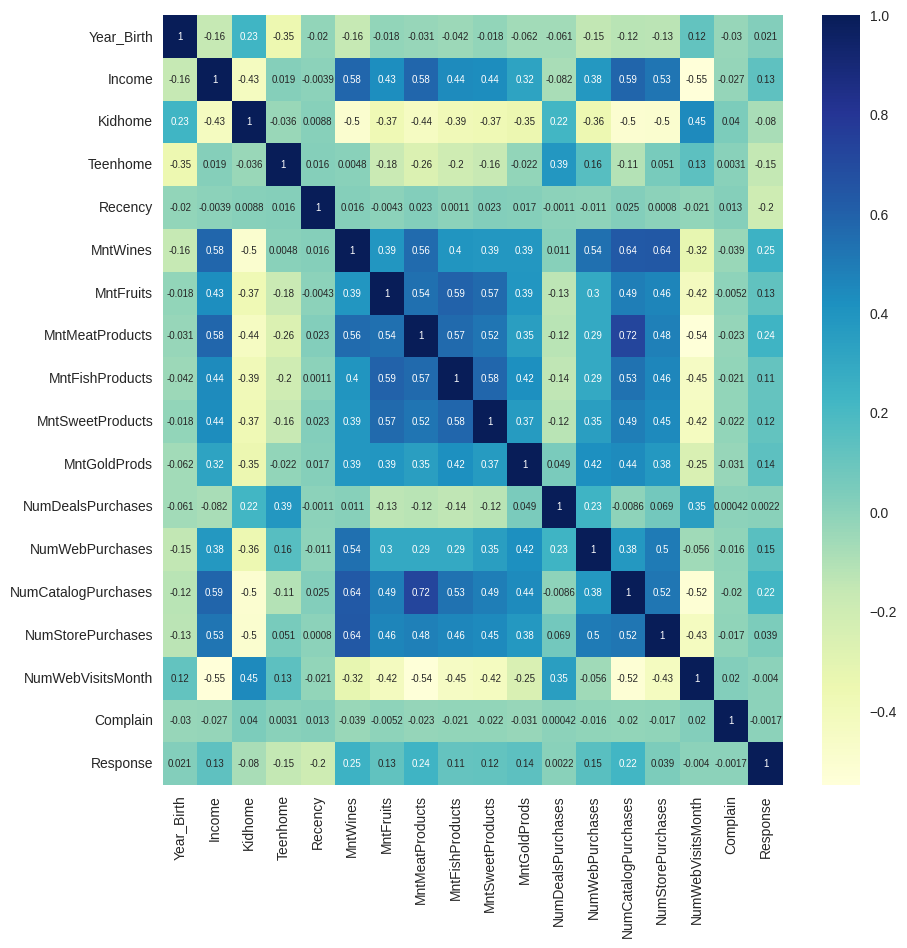

In [ ]:
# Set the size of the figure
plt.figure(figsize  = (10, 10))

# Select only the numerical columns from the dataset
num_cols = data.select_dtypes(include = "number").columns.to_list()

# Generate a heatmap to visualize the correlation matrix of the numerical features
sns.heatmap(data[num_cols].corr(), annot = True, annot_kws={"size": 7}, cmap = "YlGnBu")
plt.show()

##### **Observations:**

- High correlation between catalog purchases and meat / wine products
- High correlation between store purchases and wines
- Relatively high correlation between fish and fruit purchases
- Relatively high correlation between income and meat / wine products
- Negative correlation between web visits per month and income
- Negative correlation between web visits and store / catalog purchases

## **K-means Clustering**

In [ ]:
# Scale the data before clustering using the standard scaler

scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# Check data has been scaled
data_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,-0.985345,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.097282,2.388846
1,-1.235733,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.418612
2,-0.317643,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.097282,-0.418612
3,1.268149,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.418612
4,1.017761,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.418612


In [ ]:
# Create copy of the scaled data for kmeans labels and cluster profiling
kmeans_data = data_scaled.copy()

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

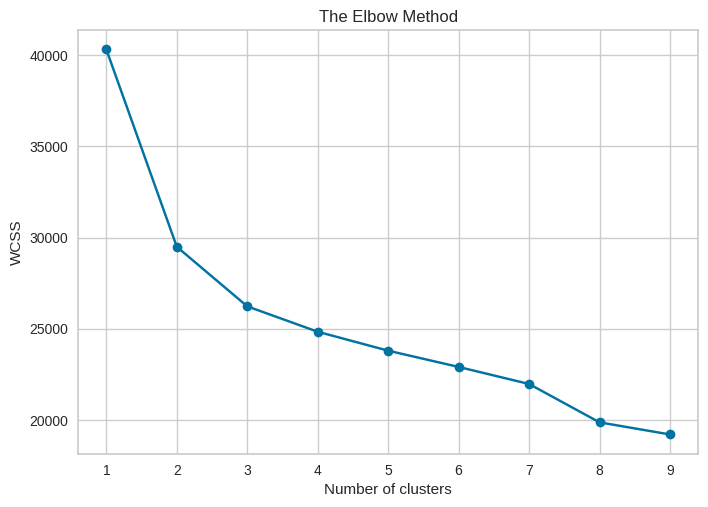

In [ ]:
# Initialise empty list to store the WCSS for each K value
wcss = []

# Iterate for a range of Ks and fit the scaled data
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)

    # Use inertia attribute and store the inertia value for that K
    wcss_val = kmeans.inertia_
    wcss.append(wcss_val)

# Produce the elbow plot
plt.figure()
plt.plot(range(1,10), wcss, 'bx-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

##### **Observations:**

From this plot, the elbow point is not very clear, but the slope starts to decrease more gradually after k=3. The change in slope at k=2 could also be interpreted as an elbow point. Therefore from the elbow method, 2 or 3 could be seen as the optimal number of clusters. Let's check the silhouette scores to see if the results agree with the elbow method.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

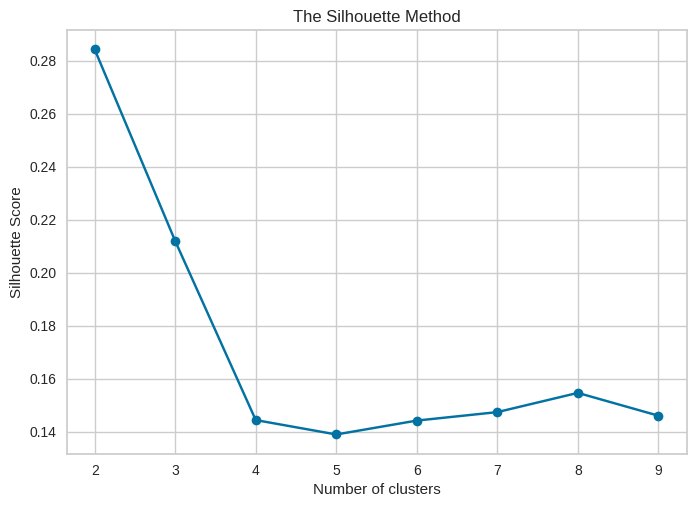

In [ ]:
# Initialise empty list to store the silhouette score for each K
sc = []

# Iterate for a range of Ks and fit the scaled data
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)

    # Store the silhouette score
    score = silhouette_score(data_scaled, labels)
    sc.append(score)

# Plot the silhouette score for each K
plt.figure()
plt.plot(range(2,10), sc, 'bx-', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score Method')
plt.show()

##### **Observations:**

The silhouette score indicates that the optimal number of clusters is clearly k=2. The answer seems aligned with that of the elbow method. We will use k=2 as the number of clusters for the rest of this analysis.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
%%time
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(kmeans_data)

CPU times: user 7.24 ms, sys: 955 µs, total: 8.2 ms
Wall time: 9.81 ms


KMeans(n_clusters=2, random_state=1)

In [ ]:
# Create a copy of the original data (with only the relevant variables)
data_new = data.copy()

# Add K-Means cluster labels to the K-Means and original dataframes
kmeans_data["KM_segments"] = kmeans.labels_
data_new["KM_segments"] = kmeans.labels_

##### **Observations:**

The total time for the model to fit the data is 8.2 ms

## **Cluster Profiling and Comparison**

In [ ]:
cluster_profile = data_new.groupby("KM_segments").mean(numeric_only = True)
cluster_profile["count"] = (data_new.groupby("KM_segments").count()['Year_Birth'].values)
cluster_profile.style.highlight_max(color = "pink", axis = 0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,count
KM_segments,,,,,,,,,,,,,,,,,,,
0,1966.890471,71717.667864,0.063527,0.434830,49.541073,595.499452,55.372399,356.765608,78.486309,57.309967,75.883899,1.982475,5.777656,5.274918,8.515882,3.676889,0.007667,0.225630,913
1,1970.123587,38851.252655,0.706104,0.555388,48.812359,103.334589,6.301432,36.353429,9.343632,6.252449,22.100226,2.560663,2.920121,0.864356,3.914846,6.444612,0.010550,0.096458,1327


#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

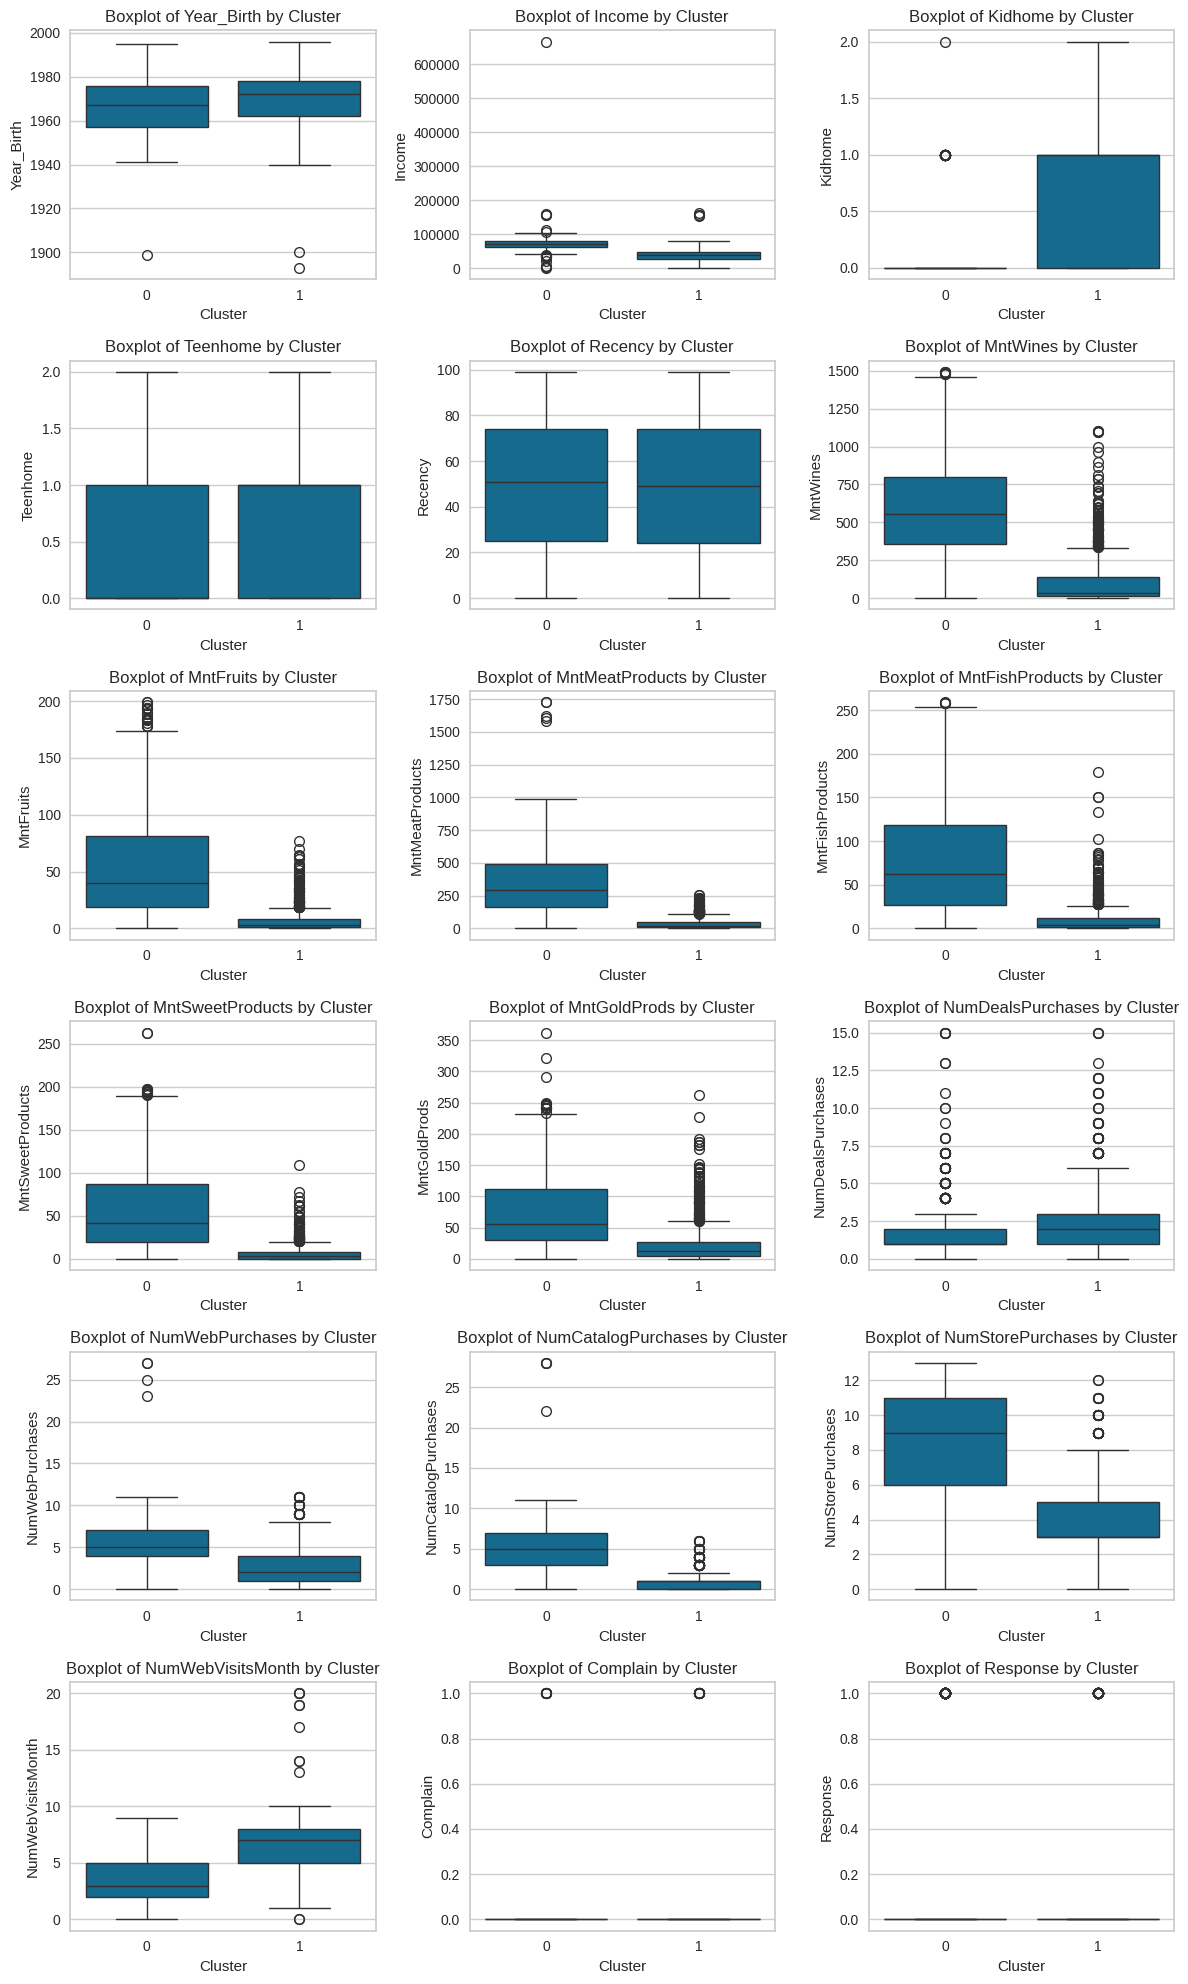

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 20))

# Get the numerical columns in the dataframe (without the label column)
num_cols = data_new.select_dtypes(include = "number").columns.to_list()[:-1]

# Iterate over the selected columns and create a boxplot for each variable
for i, col in enumerate(num_cols):
    plt.subplot(6, 3, i + 1)  # Create subplot grid with 6 rows and 3 columns
    sns.boxplot(x='KM_segments', y=col, data=data_new)  # Create a boxplot for each variable
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'Boxplot of {col} by Cluster')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

##### **Observations:**

Cluster 0:
- Most customers in this cluster have more purchases of wine, fruit, meat, fish, sweet and gold prodoucts
- There are also more purchases in stores, through catalogs and online (therefore more total purchases)
- This could be explained by the observation that customers in this cluster tend to have a higher income
- Customers seem to be slightly older on average but this doesn't seem to be a distinguishing factor

Cluster 1:
- Customers in this cluster have more kids at home on average
- There is a higher average amount of deals used on purchases
- There are more web visits per month but less purchases than in the other cluster (customers in this cluster are more likely to visit the website and not make a purchase)

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

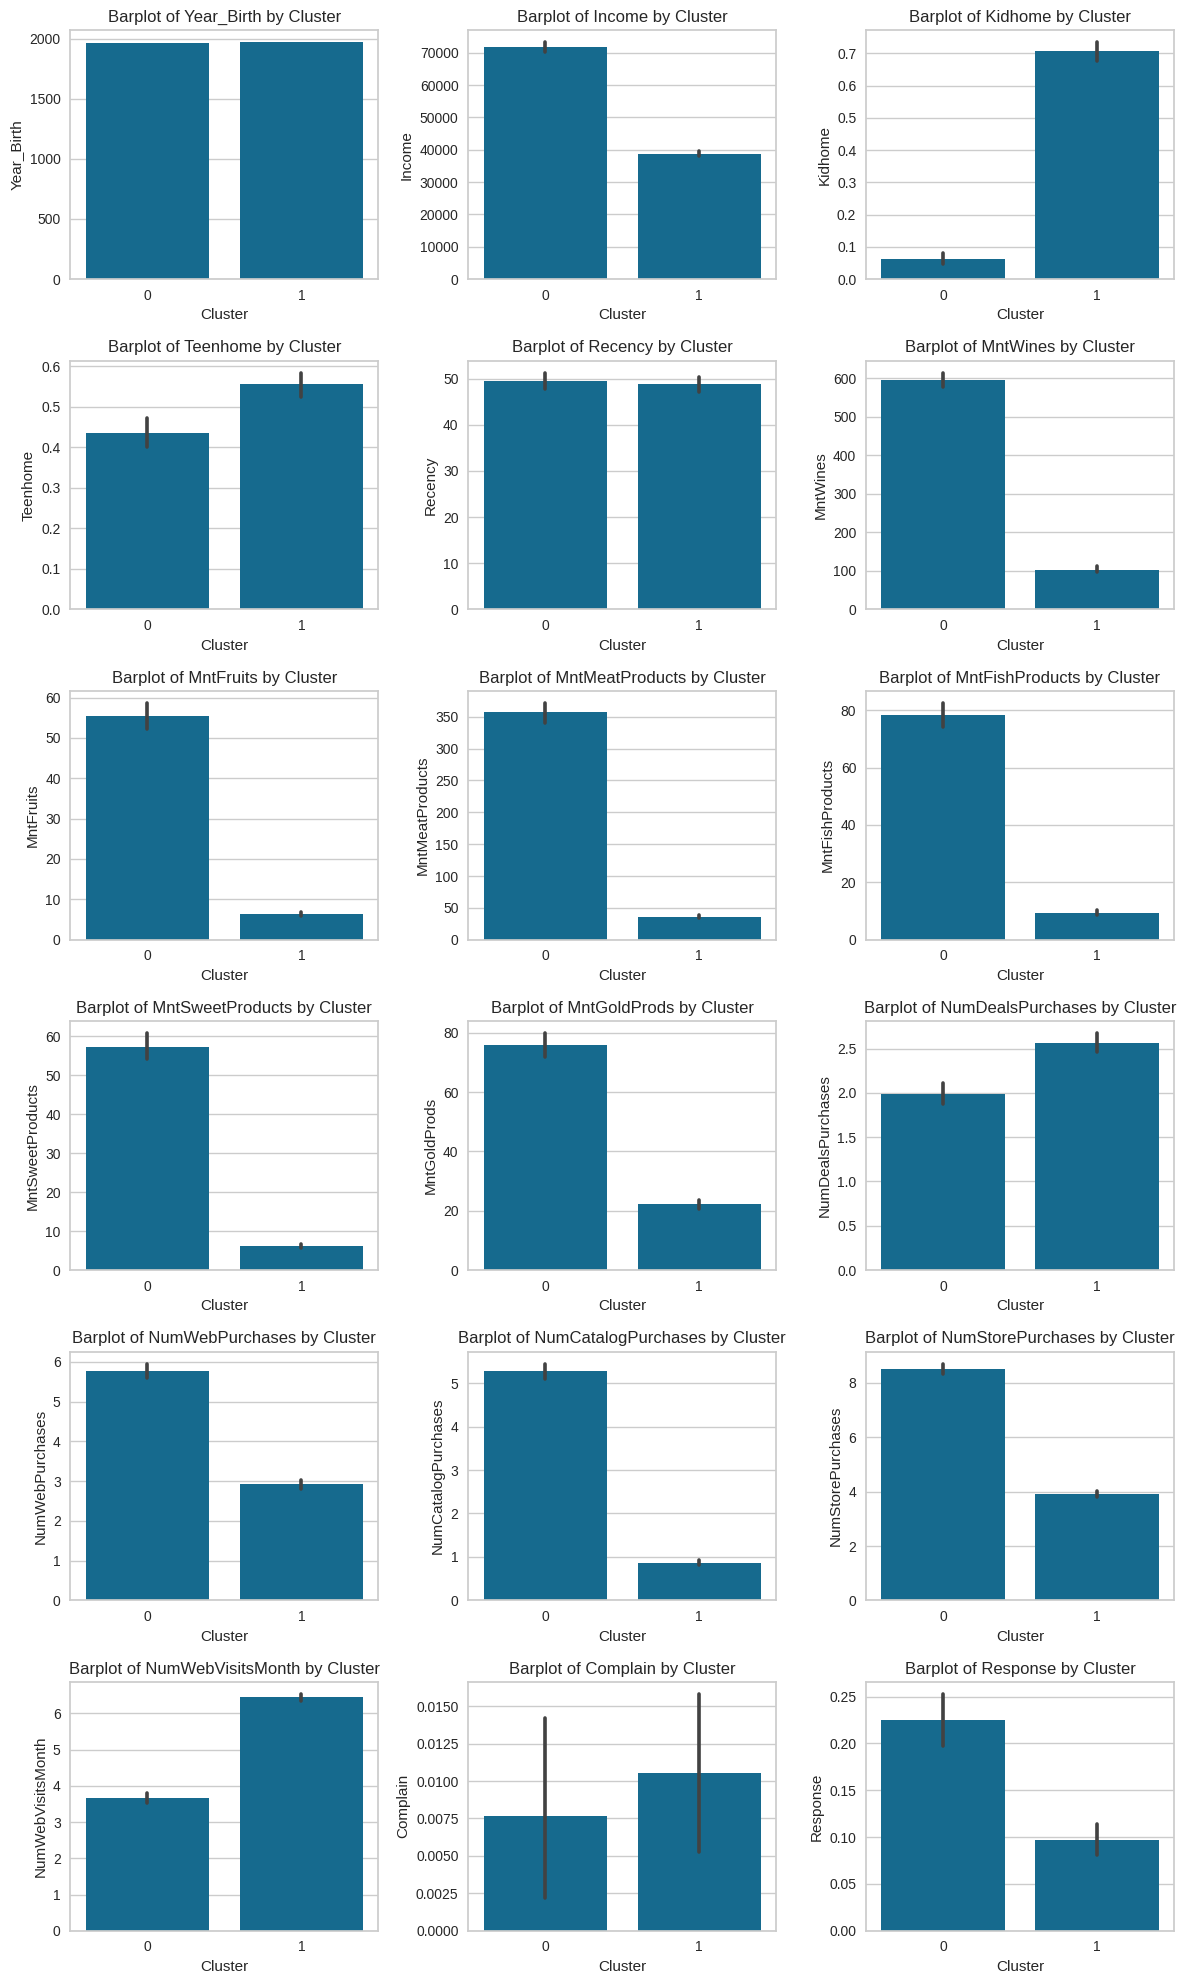

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 20))

# Get the numerical columns in the dataframe (without the label column)
num_cols = data_new.select_dtypes(include = "number").columns.to_list()[:-1]

# Iterate over the selected columns and create a barplot for each variable
for i, col in enumerate(num_cols):
    plt.subplot(6, 3, i + 1)  # Create subplot grid with 6 cols and 3 rows
    sns.barplot(x='KM_segments', y=col, data=data_new)  # Create a barplot for each variable
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'Barplot of {col} by Cluster')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

##### **Observations:**

Cluster 0:
- Much higher number of purchases across all products
- More online, catalog, and store purchases
- Higher average income (~70,000)
- Better response to the latest campaign
- Fewer teenagers and almost no kids at home on average


Cluster 1:
- Higher number on average of both kids and teenagers at home
- Lower average income (~40,000)
- More complaints
- More purchases made with deals
- More store / web purchases on average than catalog purchases (but still less store / web purchases than Cluster 0)

Year of birth and recency of the last purchase do not seem to be distinguishing factors.



## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Here are some business recommendations:

- Cluster 0 is more valuable to the company as they seem to have a much higher spending amount: monitor customer satisfaction
- Target Cluster 0 with premium products and loyalty programs to reward frequent buyers
- Target Cluster 1 with family-oriented bundles and discount coupons
- Cluster 1 visits the website more but buys less: simplify checkout and offer limited-time discounts to increase urgency of purchase



